### Functions for models

In [4]:
# fucntions for evaluating the best models with the data
def evaluate(estimator, X_tr, X_h_te, y_tr, y_h_te):
    '''
    This is to evalute the best models and outputs are the metrics and matrix
    estimator: model,
    X_tr: X_train,
    X_h_te: X_hold_test,
    y_tr: y_training set,
    y_h_te: y_hold_test
    '''
#    predicts the models
    tr_preds = estimator.predict(X_tr)
    te_h_preds = estimator.predict(X_h_te)
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train recall: {recall_score(y_tr, tr_preds)}")
    print("*" * 10)
    print("Hold Out Scores:")
    print(f"Test Accuracy: {accuracy_score(y_h_te, te_h_preds)}")
    print(f"Test precision: {precision_score(y_h_te, te_h_preds)}")
    print(f"Test recall: {recall_score(y_h_te, te_h_preds)}")
    
#     creates a report of all the scores in test set
    print(classification_report(y_h_te, te_h_preds))
    
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(estimator, X_h_te, y_h_te)

### Importing all libraries needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

### Working with the edited data set

In [2]:
edited_df = pd.read_csv('eddited_bank.csv', sep=';')
edited_df['y'] = edited_df['y'].replace(to_replace=['no', 'yes'], value=[0, 1])
edited_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown,0


In [3]:
edited_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
# split the data into categorical variable and numerical variable
cat_col = []
num_col = []

for col in edited_df.columns:
    if edited_df[col].dtype == 'object':
        cat_col.append(col)
    else:
        if col != 'y':
            num_col.append(col)

### Data Preprocessing 

In [7]:
X = edited_df.drop('y', axis=1)
y = edited_df['y']

In [8]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# for transforming the numerical and categorical variables

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_col),
    ('cat', cat_transformer, cat_col)
])

### Model Building

In [11]:
classfier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logisticregression', LogisticRegression(random_state=42))
])

# cross validating the training data 
output = cross_validate(classfier, X_train, y_train, cv=6, scoring='accuracy')
print(output['test_score'])

# outputs the test score of the cross validated sets

/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[0.90224123 0.89943969 0.90224123 0.90045716 0.90311164 0.90399646]


### Choosing hyperparameters for the logistic model

In [12]:
# splitting the trainning data again to find the best possible model without using the test data
X_trained, X_test, y_trained, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [13]:
clf_two = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistics regression', LogisticRegression(random_state=42, class_weight='balanced'))
])
# Now - cross_validate!
output_two = cross_validate(clf_two, X_trained, y_trained, cv=3, scoring=['accuracy', 'roc_auc'])
print(output_two['test_accuracy'])
print(output_two['test_roc_auc'])

[0.84285243 0.84351271 0.84164191]
[0.9083448  0.90905024 0.90676593]


In [14]:
clf_two.fit(X_trained, y_trained)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('logistics regression',
                 Lo

In [15]:
clf_two.score(X_test, y_test)

0.8506851355376824

### Evaluate the cross validated sets

Training Scores:
Train Accuracy: 0.8436227577858479
Train precision: 0.4075320512820513
Train recall: 0.8179478932132519
**********
Hold Out Scores:
Test Accuracy: 0.8506851355376824
Test precision: 0.4374793797426592
Test recall: 0.8154981549815498
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11802
           1       0.44      0.82      0.57      1626

    accuracy                           0.85     13428
   macro avg       0.70      0.84      0.74     13428
weighted avg       0.91      0.85      0.87     13428



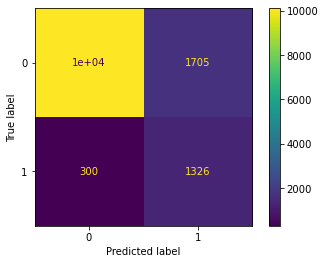

In [16]:
evaluate(clf_two, X_trained, X_test, y_trained, y_test)

### This model did not perform well as expected compared to the first model, tunning the parameters to give the best one

##### Tunning the model

In [17]:
clf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgr', LogisticRegression(random_state=42, class_weight='balanced'))])
                    
    
params = {
    'lgr__C': [100, 10, 1.0, 0.1, 0.01],
    'lgr__max_iter': [100, 1000],
    'lgr__solver': ['sag', 'lbfgs']
}

cv = GridSearchCV(clf_pipe, param_grid=params)

cv.fit(X_trained, y_trained)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                       

In [18]:
# the best parameters for the classifier pipeline
cv.best_params_

{'lgr__C': 1.0, 'lgr__max_iter': 100, 'lgr__solver': 'sag'}

### Evaluating the best model on trained data

Training Scores:
Train Accuracy: 0.8436594402259638
Train precision: 0.40759737137361757
Train recall: 0.8179478932132519
**********
Hold Out Scores:
Test Accuracy: 0.8506851355376824
Test precision: 0.4374793797426592
Test recall: 0.8154981549815498
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11802
           1       0.44      0.82      0.57      1626

    accuracy                           0.85     13428
   macro avg       0.70      0.84      0.74     13428
weighted avg       0.91      0.85      0.87     13428



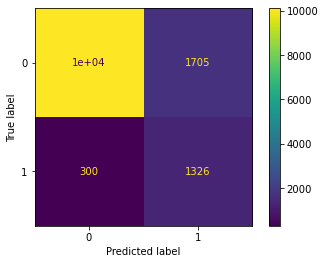

In [19]:
evaluate(cv.best_estimator_, X_trained, X_test, y_trained, y_test)

### Further tunning the hyperparameter of logistic models

In [20]:
clf_again = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgr', LogisticRegression(random_state=42))])

params = {
    'lgr__C': [100, 10, 1.0, 0.1, 0.01],
    'lgr__max_iter': [100, 1000],
    'lgr__solver': ['sag', 'lbfgs'],
    'lgr__class_weight': ['balanced', 'imbalanced']
}

cv_1 = GridSearchCV(clf_again, param_grid=params)

cv_1.fit(X_trained, y_trained)

/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                       

In [21]:
# the best model in this combination of models 
cv_1.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('lgr',
                 LogisticRegression(

### Evaluate the best model with trained data

Training Scores:
Train Accuracy: 0.9036719122556033
Train precision: 0.6473459426479561
Train recall: 0.3412672885172081
**********
Hold Out Scores:
Test Accuracy: 0.8993893357164134
Test precision: 0.6682986536107711
Test recall: 0.33579335793357934
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11802
           1       0.67      0.34      0.45      1626

    accuracy                           0.90     13428
   macro avg       0.79      0.66      0.70     13428
weighted avg       0.88      0.90      0.88     13428



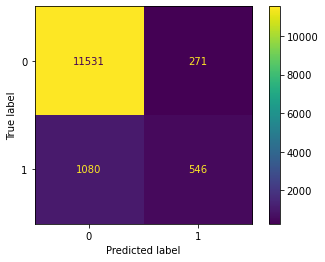

In [23]:
evaluate(cv_1.best_estimator_, X_trained, X_test, y_trained, y_test)

### Comparing the model with the hold out sets

Training Scores:
Train Accuracy: 0.9022585956892526
Train precision: 0.6543159609120521
Train recall: 0.33938753959873286
**********
Hold Out Scores:
Test Accuracy: 0.8962848297213623
Test precision: 0.6480836236933798
Test recall: 0.33574007220216606
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3968
           1       0.65      0.34      0.44       554

    accuracy                           0.90      4522
   macro avg       0.78      0.66      0.69      4522
weighted avg       0.88      0.90      0.88      4522



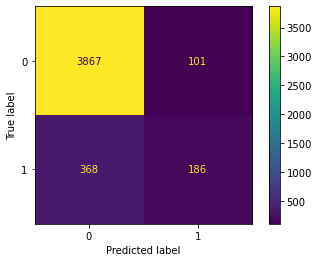

In [24]:
# To evaluate the best model with the hold out sets 
evaluate(cv_1.best_estimator_, X_train, X_hold, y_train, y_hold)


### Using the KNN classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# create a pipeline for the classifier.
knn_classfier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])
knn_classfier.fit(X_trained, y_trained)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('knn', KNeighborsClassifier())])

In [27]:
model_scored = cross_validate(knn_classfier, X_trained, y_trained, cv=5)
model_scored

{'fit_time': array([0.08675218, 0.11319304, 0.13089991, 0.12493801, 0.08607101]),
 'score_time': array([14.55156875, 12.08310699, 13.63501596, 11.59995699, 11.06491399]),
 'test_score': array([0.89602054, 0.90077036, 0.89856933, 0.89618489, 0.89893617])}

### Knn model tunning

In [28]:
# allocating different parameters for the grid to optimize the model
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

grid_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__metric': ['minkowski', 'manhattan'],
    'knn__weights': ['uniform', 'distance']
}

In [29]:
gs_knn = GridSearchCV(estimator=knn_model, param_grid=grid_params, cv=5)
gs_knn.fit(X_trained, y_trained)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                    

In [30]:
gs_knn.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}

### Evaluating the best knn model with trainning data

Training Scores:
Train Accuracy: 1.0
Train precision: 1.0
Train recall: 1.0
**********
Hold Out Scores:
Test Accuracy: 0.8939529341674114
Test precision: 0.6301546391752577
Test recall: 0.3007380073800738
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11802
           1       0.63      0.30      0.41      1626

    accuracy                           0.89     13428
   macro avg       0.77      0.64      0.67     13428
weighted avg       0.88      0.89      0.88     13428



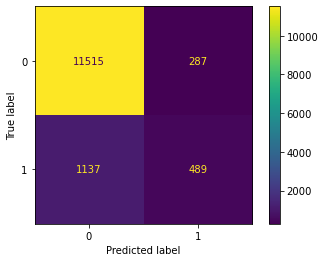

In [31]:
evaluate(gs_knn.best_estimator_, X_trained, X_test, y_trained, y_test)

### Evalute the best knn model with the hold out sets

Training Scores:
Train Accuracy: 0.965002826316695
Train precision: 0.9261261261261261
Train recall: 0.7598732840549103
**********
Hold Out Scores:
Test Accuracy: 0.8976116762494472
Test precision: 0.6784313725490196
Test recall: 0.31227436823104693
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3968
           1       0.68      0.31      0.43       554

    accuracy                           0.90      4522
   macro avg       0.79      0.65      0.69      4522
weighted avg       0.88      0.90      0.88      4522



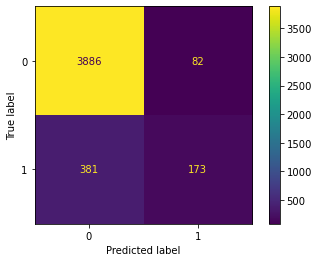

In [32]:
evaluate(gs_knn.best_estimator_, X_train, X_hold, y_train, y_hold)

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(random_state=42))
])
# grid searh to choose the best (combination of) hyperparameters
params_forest_model ={'rfc__n_estimators': [100,200,400],'rfc__max_depth': [20,40,50,60]}

gs_rand_forest=GridSearchCV(estimator= knn_model,
               param_grid= params_forest_model,
               cv=5)

gs_rand_forest.fit(X_trained, y_trained)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                    

### Evaluate the best Random forest model with hold out data

Training Scores:
Train Accuracy: 0.9669443830027772
Train precision: 0.9302030456852792
Train recall: 0.7740232312565998
**********
Hold Out Scores:
Test Accuracy: 0.9013710747456878
Test precision: 0.6812080536912751
Test recall: 0.3664259927797834
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3968
           1       0.68      0.37      0.48       554

    accuracy                           0.90      4522
   macro avg       0.80      0.67      0.71      4522
weighted avg       0.89      0.90      0.89      4522



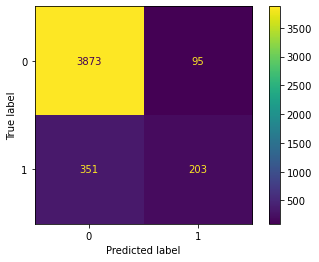

In [35]:
evaluate(gs_rand_forest.best_estimator_, X_train, X_hold, y_train, y_hold)

### Get the important features into a dataframe

In [190]:
# Feature importance rankings.
importances = gs_rand_forest.best_estimator_.named_steps['rfc'].feature_importances_

In [191]:
len(importances)

47

In [154]:
# the transformed columns of numerical variables
num_cols = gs_rand_forest.best_estimator_['preprocessor'].transformers_[0][2]

In [174]:
# transformed columns in the encoded variable
feature_name_importance = gs_rand_forest.best_estimator_['preprocessor'].transformers_[1][1]['ohe'].get_feature_names(cat_col)

In [ ]:
# one of the problem, we had was the allocating of the importance with its name. Be aware to check
# for the length of the cols and importance when creating the data frame.

In [189]:
# creating a list of all the columns 
# note: * is for unpacking the lists
final_cols = [*num_cols, *feature_name_importance]
len(final_cols)

47

In [195]:
# putting together the one hot encoder columns and feature importance into a dataframe
# called feature importance dataframe

feature_impor_df = pd.DataFrame.from_dict(dict(zip(final_cols, importances)),
                            orient='index').sort_values(by=0, ascending=False)
feature_impor_df.head()

,0
duration,0.261428
balance,0.102074
age,0.100605
day,0.086531
poutcome_success,0.054112


<AxesSubplot:>

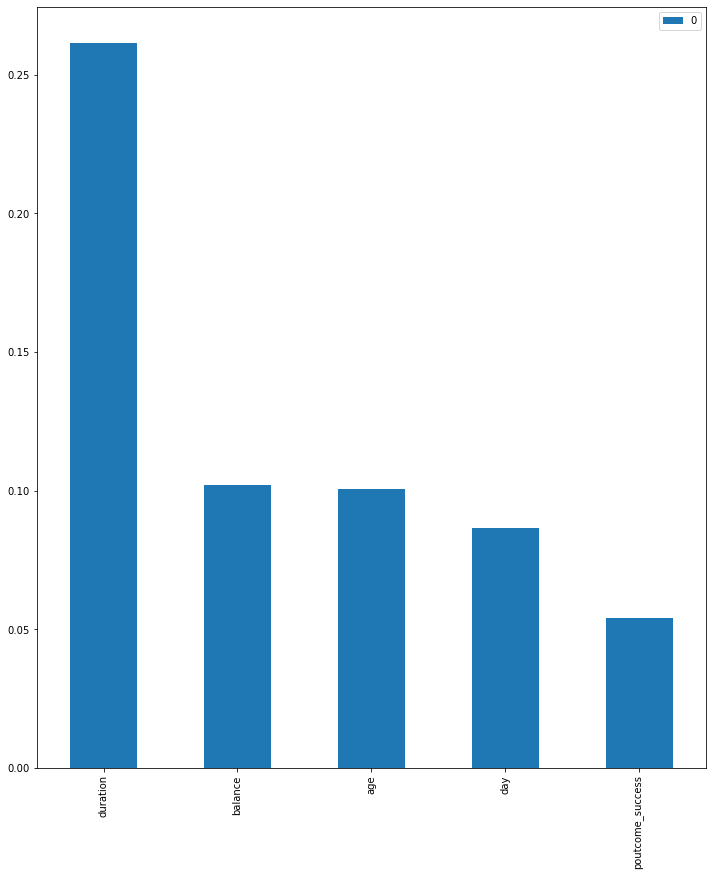

In [202]:
feature_impor_df.head().plot(kind='bar', figsize=(12,14))

### Metrics for all models types

In [40]:
# logistics metrics
logistics_preds = cv_1.best_estimator_.predict(X_hold)
logistics_precision = precision_score(y_hold, logistics_preds)
logistics_recall = recall_score(y_hold, logistics_preds)

In [41]:
# knn metrics 
knn_preds = gs_knn.best_estimator_.predict(X_hold)
knn_precision = precision_score(y_hold, knn_preds)
knn_recall = recall_score(y_hold, knn_preds)

In [42]:
# random Forest metric
rand_forest_preds = gs_rand_forest.best_estimator_.predict(X_hold)
rand_forest_precision = precision_score(y_hold, rand_forest_preds)
rand_forest_recall = recall_score(y_hold, knn_preds)

In [43]:
final_df = pd.DataFrame({'Model type': ['logistic Model', 'Knn Classifier Model', 'Random forest Model'],
                        'Score': [cv_1.best_score_, gs_knn.best_score_, gs_rand_forest.best_score_],
                        'precision_metrics': [logistics_precision, knn_precision, rand_forest_precision],
                        'recall_metrics': [logistics_recall, knn_recall, rand_forest_recall]})
final_df

,Models,Score,precision_metrics,recall_metrics
0,logistic Model,0.903415,0.648084,0.335740
1,Knn Classifier Model,0.901067,0.678431,0.312274
2,Random forest Model,0.906753,0.681208,0.312274


- The Random forest model have the highest precision of 68%
- evaluating the model on how many times it predicts the client is going to make a deposit actually makes a deposit